![example](images/director_shot.jpeg)

# Project Title

**Authors:** Student 1, Student 2, Student 3
***

## Overview

A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.

## Business Problem

Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

***
Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?
***

## Data Understanding

Describe the data being used for this project.
***
Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?
***

In [142]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

%matplotlib inline

## Exploratory Data Analysis
***
This section covers loading the datasets and looking through each to gain a high level understanding of each. 

In [144]:
#Read the data and save into respective dataframes
basics_df = pd.read_csv ("zippedData/title.basics.csv")
ratings_df = pd.read_csv("zippedData/title.ratings.csv")
movie_gross_df =  pd.read_csv("zippedData/bom.movie_gross.csv")



### Previewing each DataFrame
This will help us understand columns of each table, the number of rows in each and what each row represents


In [61]:
# find out number of columns and rows
basics_df.shape 

(146144, 6)

In [62]:
#display the top 5 observations of the dataset 
basics_df.head() 

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In the basics table, each row represents a  Title/Film with the following characteristics:
* Unique identifier
* Original and Primary(Popular) Titles
* Start year and the runtime  
* Genre/Category

In [63]:
#display the last 5 observations of the basics_df 
basics_df.tail() 

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [64]:
#check the shape of ratings_df
ratings_df.shape

(73856, 3)

In [65]:
# preview the first 5 rows
ratings_df.head() 

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In the ratings table, each row represents a Title's average rating and the number of votes that led to the said rating.

In [66]:
#preview the first 5 rows of movie_gross_df
movie_gross_df.head() 

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


Each row in this table represents a title's name, the studio, Domestic and Foreign earnings as well as the year the film was released

In [67]:
#preview the last 5 rows 
movie_gross_df.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


*there is a notably high number of NaN values in the foreign_gross column. This will be addressed in the data praparation step*

In [68]:
#merge basic_df and ratings_df as info is highly related. 
combined_df = basics_df.merge(ratings_df, on='tconst')
combined_df.shape

(73856, 8)

## Data Preparation

Describe and justify the process for preparing the data for analysis.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [69]:
#view sample records from the combined DataFrame
combined_df.sample(5)

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
13379,tt1920939,Gekijouban Tenisu no oujisama: Eikokushiki tei...,Gekijouban Tenisu no oujisama: Eikokushiki tei...,2011,NaN,"Animation,Sport",6.1,11
43676,tt4174594,Memoria Oculta,Memoria Oculta,2014,60.0,"Biography,Documentary",8.1,12
15296,tt2014255,Iranian Taboo,Iranian Taboo,2011,78.0,Documentary,8.6,39
46918,tt4568736,No Limits: The Thalidomide Saga,No Limits: The Thalidomide Saga,2016,NaN,Documentary,8.4,8
33401,tt3212392,Actress,Actress,2014,86.0,"Documentary,Drama",6.1,318


In [70]:
#Get info about columns, their data types and number of values in each
combined_df.info()
your_experience = 'h3'

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [71]:
your_experience != 'Knowledge'

True

In [72]:
#Check for duplicated rows: 
print("Duplicate rows:", combined_df.duplicated().sum())


Duplicate rows: 0


In [153]:
#check for null values in the columns and their percentages 
def null_percentages (data_frame): 
    null_values = data_frame.isnull().sum()
    percentage_null = data_frame.isnull().sum()/(len (data_frame)) * 100
    return pd.concat([null_values, percentage_null],
                      axis=1, 
                      keys=['Values', 'Null Percentage'])



In [154]:
null_percentages(combined_df)

,Values,Null Percentage
tconst,0,0.0
primary_title,0,0.0
original_title,0,0.0
start_year,0,0.0
runtime_minutes,0,0.0
genres,0,0.0
averagerating,0,0.0
numvotes,0,0.0


runtime_minutes apppears to have 10% missing values. 
Start by addressing the missing values in that column

count    66236.000000
mean        94.654040
std        208.574111
min          3.000000
25%         81.000000
50%         91.000000
75%        104.000000
max      51420.000000
Name: runtime_minutes, dtype: float64


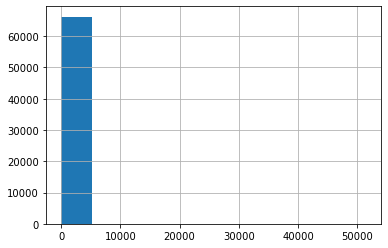

In [74]:
#understand the distribution of values in the column
print(combined_df['runtime_minutes'].describe())
combined_df['runtime_minutes'].hist();

### Handling Missing Values 

#### a). runtime_minutes column
Handling missing values by filling in with a measure of central tendency because:
 * *With the data being heavily skewed, imputing the missing values using the mean would distort the initital distribution*
 * *Dropping the values would lead to loss of over 10% of the rows which contains data from other columns*


In [75]:
#Fill missing values using the median in a new column. 
combined_df['runtime_minutes'] = combined_df['runtime_minutes'].fillna(
    combined_df['runtime_minutes'].median()
    )
print("Number of rows left with null values: ",
      combined_df['runtime_minutes'].isnull().sum())

Number of rows left with null values:  0


#### b). genres column

From the analysis above, 804 values were missing in the **Genres** column, translating to ~1%. \
Dropping these rows is unlikely to have a significant impact on the of the data. 

In [76]:
#Drop rows that contain null values in the Genres column
combined_df = combined_df.dropna(subset=['genres'], axis=0)
combined_df.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,91.0,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [77]:
#check again for null values and their percentages
null_values = combined_df.isnull().sum()
percentage_null = combined_df.isnull().sum()/(len (combined_df)) * 100
pd.concat([null_values, percentage_null], 
          axis=1, 
          keys=['Values', 
                'Null Percentage'])

,Values,Null Percentage
tconst,0,0.0
primary_title,0,0.0
original_title,0,0.0
start_year,0,0.0
runtime_minutes,0,0.0
genres,0,0.0
averagerating,0,0.0
numvotes,0,0.0


### Handling outliers

Skewness value:  241.43892669427055


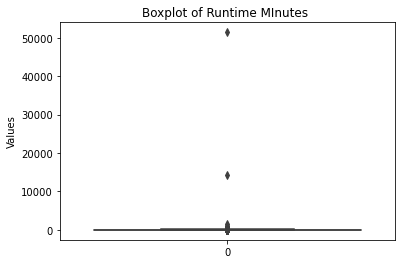

In [78]:
#check for outliers using boxplot and skew() method
boxplot = sns.boxplot(data = combined_df['runtime_minutes'])
boxplot.set(ylabel = "Values", title = "Boxplot of Runtime MInutes ");
print("Skewness value: ",combined_df['runtime_minutes'].skew())

From the shape of the boxplot above, extreme outliers appear present.\
A heavy skew value of +242 suggests the same

##### a). Outlier Treatment by Trimming

In [79]:
#Remove the outliers below the 1st percentile and beyond the 9th percentile 
p1 = int(combined_df['runtime_minutes'].quantile( q = .10))
p9 = int(combined_df['runtime_minutes'].quantile( q = .90))

index = combined_df [(combined_df['runtime_minutes'] > p9 )|
                     (combined_df['runtime_minutes'] < p1)].index

print("Total number of rows outside (1st - 9th) percentile range ", len(index))

Total number of rows outside (1st - 9th) percentile range  13147


13323 is a lot of rows to drop, so we'll try another method

##### b). Outlier Treatment by Replacing with median values

In [80]:
#find the median 
median_value = combined_df['runtime_minutes'].median() 

#replace outliers with median value
combined_df['runtime_minutes'] = np.where (combined_df['runtime_minutes'] < p1,
                                            median_value, 
                                            combined_df['runtime_minutes'] )
combined_df['runtime_minutes'] = np.where (combined_df['runtime_minutes']> p9,
                                            median_value, 
                                            combined_df['runtime_minutes'] )



Skewness value:  0.48308825221684354


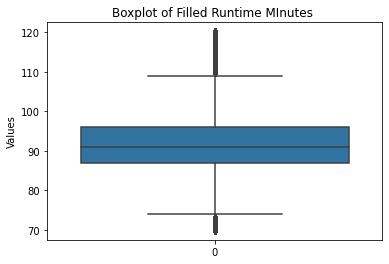

In [81]:
#check again for outliers using boxplot and skew() method
boxplot = sns.boxplot(data = combined_df['runtime_minutes'])
boxplot.set(ylabel = "Values",
            title = "Boxplot of Filled Runtime MInutes ");
print("Skewness value: ",
      combined_df['runtime_minutes'].skew())

count    73052.000000
mean        92.069170
std         10.187417
min         70.000000
25%         87.000000
50%         91.000000
75%         96.000000
max        120.000000
Name: runtime_minutes, dtype: float64


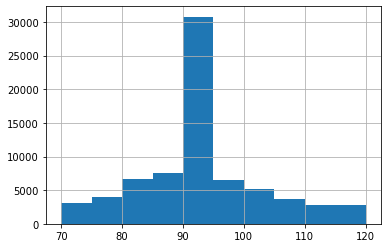

In [82]:
# re-check distribution of values in the column
print(combined_df['runtime_minutes'].describe())
combined_df['runtime_minutes'].hist();

## Question 1: What are the most Popular Genres? 
From the business understanding, Microsoft would need to know which genres are doing best.\
Assumption - the viewership of a movie is directly related to its weighted rating, as more reviewed genres are more likely to have been viewed more

In [115]:
#group by genres
grouped_by_genre = combined_df.groupby("genres", as_index=False)


In [116]:
#explore the resulting groups
grouped_by_genre['numvotes'].sum()

,genres,numvotes
0,Action,329057
1,"Action,Adult,Comedy",36
2,"Action,Adventure",109011
3,"Action,Adventure,Animation",3570543
4,"Action,Adventure,Biography",999701
...,...,...
918,Thriller,440564
919,"Thriller,War",7166
920,"Thriller,Western",13288
921,War,5535


In [118]:
#Find top 5 genres by number of votes
best_genre_by_numvotes = grouped_by_genre['numvotes'].sum().sort_values(
    by='numvotes',  
    ascending=False
    )[:5]
best_genre_by_numvotes 

,genres,numvotes
17,"Action,Adventure,Sci-Fi",23023248
10,"Action,Adventure,Fantasy",9658883
157,"Adventure,Animation,Comedy",8687435
693,Drama,8395521
472,"Comedy,Drama,Romance",7665463


In [121]:
# Find top 5 genres by average rating
best_genre_by_avrating = grouped_by_genre['averagerating'].sum().sort_values(
    by = 'averagerating', 
    ascending=False)[:5]
best_genre_by_avrating

,genres,averagerating
693,Drama,75411.4
612,Documentary,75220.9
431,Comedy,32431.9
462,"Comedy,Drama",16654.9
856,Horror,13017.1


In [224]:
type(best_genre_by_avrating)

pandas.core.frame.DataFrame

In [242]:
#add each item in the above genres to a list
top_genres = []
def splitter(series):
    for item in series['genres']:
        top_genres.extend(item.split(","))


# splitter


splitter(best_genre_by_numvotes)
splitter(best_genre_by_avrating)
# type(best_genre_by_numvotes['genres'])
# print (best_genre_by_numvotes)

# top_genres = [genre for genre in best_genre_by_numvotes['genre'].split(",")]
top_genres


['Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Fantasy',
 'Adventure',
 'Animation',
 'Comedy',
 'Drama',
 'Comedy',
 'Drama',
 'Romance',
 'Drama',
 'Documentary',
 'Comedy',
 'Comedy',
 'Drama',
 'Horror']

In [243]:
#find genres that appear most frequently in the list

def plot_bar_graph(top_genres):
    # Count the occurrences of each genre in the list
    genre_counts = Counter(top_genres)
    
    # Get the unique genres and their corresponding frequencies
    genres, frequencies = zip(*genre_counts.items())
    
    # Create the bar graph with specified figure size (8x8 inches)
    plt.figure(figsize=(8, 8))
    
    # Plot the bar graph
    plt.bar(genres, frequencies, alpha=0.7)
    
    # Set x-axis label to be slanted and improve readability
    plt.xticks(rotation=45, ha='right')
    
    plt.xlabel("Genres")
    plt.ylabel("Relative Popularity")
    plt.title("Bar Graph of Top 5 Most Popular Genres by Weighted Rating")
    
    # Adjust the layout to avoid cutting off labels
    plt.tight_layout()
    
    plt.show()


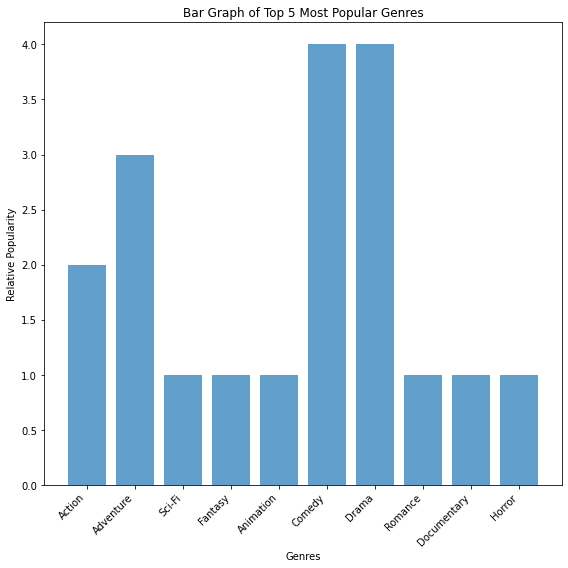

In [244]:
plot_bar_graph (top_genres)

From the Analysis above, Microsoft should consider creating films in the **Comedy** and **Drama** genres, followed by Adventure and Action 

## Which Genres have the highest returns?
As a business, Microsoft should also consider the performance in revenue of the genres. \
By knowing the genres that perform best, the company would be hoping to replicate the success by joining the bandwagon.

In [149]:
#preview movie gross df 
movie_gross_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [155]:
#find null percentages 
null_percentages(movie_gross_df)

,Values,Null Percentage
title,0,0.000000
studio,5,0.147623
domestic_gross,28,0.826690
foreign_gross,1350,39.858282
year,0,0.000000


In [169]:
#drop foreign_gross due to high nan percentage, alongside other unneeded columns 
movie_gross_df.drop(['foreign_gross', 'studio', 'year'], 
                    axis=1, 
                    inplace= True)
movie_gross_df

,title,domestic_gross
0,Toy Story 3,415000000.0
1,Alice in Wonderland (2010),334200000.0
2,Harry Potter and the Deathly Hallows Part 1,296000000.0
3,Inception,292600000.0
4,Shrek Forever After,238700000.0
...,...,...
3382,The Quake,6200.0
3383,Edward II (2018 re-release),4800.0
3384,El Pacto,2500.0
3385,The Swan,2400.0


In [170]:
#merge with basics df 
returns_df = movie_gross_df.merge(basics_df, 
                                  left_on= "title", 
                                  right_on= "primary_title")
returns_df.sample(10)

,title,domestic_gross,tconst,primary_title,original_title,start_year,runtime_minutes,genres
2013,Serena,176000.0,tt5749696,Serena,Serena,2016,95.0,"Biography,Documentary,Sport"
2143,The New Girlfriend,147000.0,tt3184934,The New Girlfriend,Une nouvelle amie,2014,108.0,Drama
1491,The Boxtrolls,50800000.0,tt0787474,The Boxtrolls,The Boxtrolls,2014,96.0,"Adventure,Animation,Comedy"
826,People Like Us,12400000.0,tt1716777,People Like Us,People Like Us,2012,114.0,"Comedy,Drama"
1652,Ode to My Father,2300000.0,tt3812366,Ode to My Father,Gukjesijang,2014,126.0,"Drama,War"
3276,Foxtrot,619000.0,tt6896536,Foxtrot,Foxtrot,2017,113.0,Drama
204,Tees Maar Khan,1100000.0,tt1572311,Tees Maar Khan,Tees Maar Khan,2010,135.0,"Comedy,Crime"
335,Contagion,75700000.0,tt1598778,Contagion,Contagion,2011,106.0,"Action,Drama,Thriller"
2030,By the Sea,538000.0,tt4301034,By the Sea,A Orillas del Mar,2016,80.0,Drama
2106,Noble,347000.0,tt2626090,Noble,Noble,2014,100.0,"Biography,Drama"


In [179]:
#drop unneeded columns in the new DataFrame
returns_df.drop(['tconst', 'original_title' ,'start_year', 'runtime_minutes'], 
                axis=1, 
                inplace=True)
returns_df.sample(10)

,title,domestic_gross,primary_title,genres
923,I Wish,146000.0,I Wish,"Comedy,Romance"
819,Hit and Run,13700000.0,Hit and Run,"Action,Comedy"
1624,Ragnarok,1400.0,Ragnarok,"Action,Adventure"
1816,Inside Out,356500000.0,Inside Out,NaN
3294,Karwaan,182000.0,Karwaan,"Comedy,Drama"
2657,The Son of Joseph,30600.0,The Son of Joseph,Drama
3142,Widows,42400000.0,Widows,"Crime,Drama,Thriller"
2472,The Autopsy of Jane Doe,10500.0,The Autopsy of Jane Doe,"Horror,Mystery,Thriller"
58,The Bounty Hunter,67099999.0,The Bounty Hunter,NaN
2704,Klown Forever,5700.0,Klown Forever,"Comedy,Drama"


In [183]:
#check for duplicates
returns_df[returns_df.duplicated() == True]

,title,domestic_gross,primary_title,genres
40,Red,90400000.0,Red,Drama
47,Unstoppable,81600000.0,Unstoppable,Documentary
49,Unstoppable,81600000.0,Unstoppable,Documentary
50,Unstoppable,81600000.0,Unstoppable,Documentary
164,Conviction,6800000.0,Conviction,Drama
...,...,...,...,...
3302,The Guardians,177000.0,The Guardians,Documentary
3320,In Between,108000.0,In Between,Drama
3328,Custody,83900.0,Custody,Drama
3357,The Escape,14000.0,The Escape,Drama


In [185]:
#drop duplicates
returns_df.drop_duplicates( inplace=True)

In [189]:
#check again for null percentages 
null_percentages(returns_df)


,Values,Null Percentage
title,0,0.000000
domestic_gross,23,0.703364
primary_title,0,0.000000
genres,37,1.131498


In [191]:
#drop null values
returns_df.dropna(subset=['domestic_gross', 'genres'], 
                  axis=0, 
                  inplace=True)
returns_df


,title,domestic_gross,primary_title,genres
0,Toy Story 3,415000000.0,Toy Story 3,"Adventure,Animation,Comedy"
1,Inception,292600000.0,Inception,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,238700000.0,Shrek Forever After,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,300500000.0,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy"
4,Iron Man 2,312400000.0,Iron Man 2,"Action,Adventure,Sci-Fi"
...,...,...,...,...
3361,Souvenir,11400.0,Souvenir,"Comedy,Romance"
3362,Souvenir,11400.0,Souvenir,Documentary
3363,Beauty and the Dogs,8900.0,Beauty and the Dogs,"Crime,Drama,Thriller"
3364,The Quake,6200.0,The Quake,"Action,Drama,Thriller"


In [234]:
#group by genres
gross_by_genre = returns_df.groupby("genres", as_index=False)
gross_by_genre.head()


,title,domestic_gross,primary_title,genres
0,Toy Story 3,415000000.0,Toy Story 3,"Adventure,Animation,Comedy"
1,Inception,292600000.0,Inception,"Action,Adventure,Sci-Fi"
2,Shrek Forever After,238700000.0,Shrek Forever After,"Adventure,Animation,Comedy"
3,The Twilight Saga: Eclipse,300500000.0,The Twilight Saga: Eclipse,"Adventure,Drama,Fantasy"
4,Iron Man 2,312400000.0,Iron Man 2,"Action,Adventure,Sci-Fi"
...,...,...,...,...
3332,Tehran Taboo,74800.0,Tehran Taboo,"Animation,Drama"
3338,Before We Vanish,52100.0,Before We Vanish,"Drama,Sci-Fi"
3347,The Workshop,22100.0,The Workshop,"Documentary,Family"
3350,Loving Pablo,22000.0,Loving Pablo,"Action,Biography,Crime"


In [248]:
# Find top 5 earning genres 
top5_by_gross = gross_by_genre['domestic_gross'].sum().sort_values(by="domestic_gross", 
                                                                   ascending=False
                                                                   )[:10]
top5_by_gross



,genres,domestic_gross
13,"Action,Adventure,Sci-Fi",1.102470e+10
81,"Adventure,Animation,Comedy",9.645133e+09
9,"Action,Adventure,Fantasy",4.378787e+09
254,Drama,3.747715e+09
4,"Action,Adventure,Comedy",3.172472e+09
168,Comedy,2.665186e+09
233,Documentary,2.644667e+09
2,"Action,Adventure,Animation",2.184660e+09
187,"Comedy,Drama,Romance",1.891657e+09
14,"Action,Adventure,Thriller",1.851798e+09


In [249]:
#add each item in the above genres to a list
top_genres = []

splitter(top5_by_gross)

top_genres

['Action',
 'Adventure',
 'Sci-Fi',
 'Adventure',
 'Animation',
 'Comedy',
 'Action',
 'Adventure',
 'Fantasy',
 'Drama',
 'Action',
 'Adventure',
 'Comedy',
 'Comedy',
 'Documentary',
 'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Drama',
 'Romance',
 'Action',
 'Adventure',
 'Thriller']

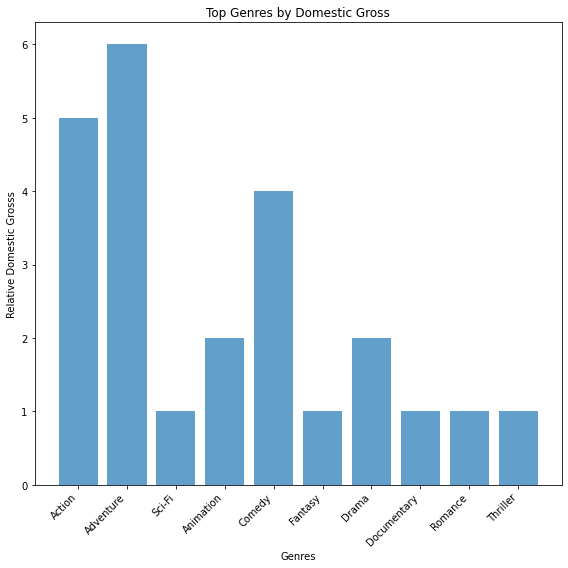

In [250]:
#find genres that appear most frequently in the list

def plot_bar_graph(top_genres):
    # Count the occurrences of each genre in the list
    genre_counts = Counter(top_genres)
    
    # Get the unique genres and their corresponding frequencies
    genres, frequencies = zip(*genre_counts.items())
    
    # Create the bar graph with specified figure size (8x8 inches)
    plt.figure(figsize=(8, 8))
    
    # Plot the bar graph
    plt.bar(genres, frequencies, alpha=0.7)
    
    # Set x-axis label to be slanted and improve readability
    plt.xticks(rotation=45, ha='right')
    
    plt.xlabel("Genres")
    plt.ylabel("Relative Domestic Grosss")
    plt.title("Top Genres by Domestic Gross")
    
    # Adjust the layout to avoid cutting off labels
    plt.tight_layout()
    
    plt.show()

plot_bar_graph (top_genres)

## Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [ ]:
# Here you run your code to model the data


## Evaluation
Evaluate how well your work solves the stated business problem.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***